 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_data = Path('Resources/whale_returns.csv')
whale = pd.read_csv(whale_data, index_col = 'Date', infer_datetime_format = True, parse_dates = True)
whale.sort_index(inplace = True)
whale.head()

/var/folders/gs/w1q4fksx5gd23d1fqxjmk5_w0000gn/T/ipykernel_36092/1966334288.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale = pd.read_csv(whale_data, index_col = 'Date', infer_datetime_format = True, parse_dates = True)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count whale nulls
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop whale nulls and recount them to verify they've been dropped
whale.dropna()
clean_whale = whale.dropna()
clean_whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_data = Path('Resources/algo_returns.csv')
algo = pd.read_csv(algo_data, index_col = 'Date', infer_datetime_format = True, parse_dates = True)
algo.sort_index(inplace = True)
algo.head()

/var/folders/gs/w1q4fksx5gd23d1fqxjmk5_w0000gn/T/ipykernel_36092/893138983.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo = pd.read_csv(algo_data, index_col = 'Date', infer_datetime_format = True, parse_dates = True)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count algo nulls
algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop algo nulls and recount them to verify
algo.dropna()
clean_algo = algo.dropna()
clean_algo.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_data = Path('Resources/sp500_history.csv')
sp500 = pd.read_csv(sp500_data, index_col = 'Date', infer_datetime_format = True, parse_dates = True)
sp500.sort_index(inplace = True)
sp500.head()

/var/folders/gs/w1q4fksx5gd23d1fqxjmk5_w0000gn/T/ipykernel_36092/1079228555.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp500 = pd.read_csv(sp500_data, index_col = 'Date', infer_datetime_format = True, parse_dates = True)
/var/folders/gs/w1q4fksx5gd23d1fqxjmk5_w0000gn/T/ipykernel_36092/1079228555.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500 = pd.read_csv(sp500_data, index_col = 'Date', infer_datetime_format = True, parse_dates = True)


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types (turn object into float)
sp500['Close'] = sp500['Close'].str.replace('$', '').astype("float")
sp500.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
sp500_returns = sp500.pct_change()  # New price - old price / old price
sp500_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [20]:
# Drop SP500 nulls
clean_sp500 = sp500_returns.isnull().sum()  ## Checking for nulls. There's one. 
clean_sp500 = sp500_returns.dropna()
clean_sp500

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [21]:
# Rename `Close` Column to be specific to this portfolio.
clean_sp500.columns = ['SP500 Daily Return']
clean_sp500.head()

,SP500 Daily Return
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [22]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns
joined_returns = pd.concat([clean_whale, clean_algo, clean_sp500], axis = 'columns', join = 'inner')
joined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Daily Return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

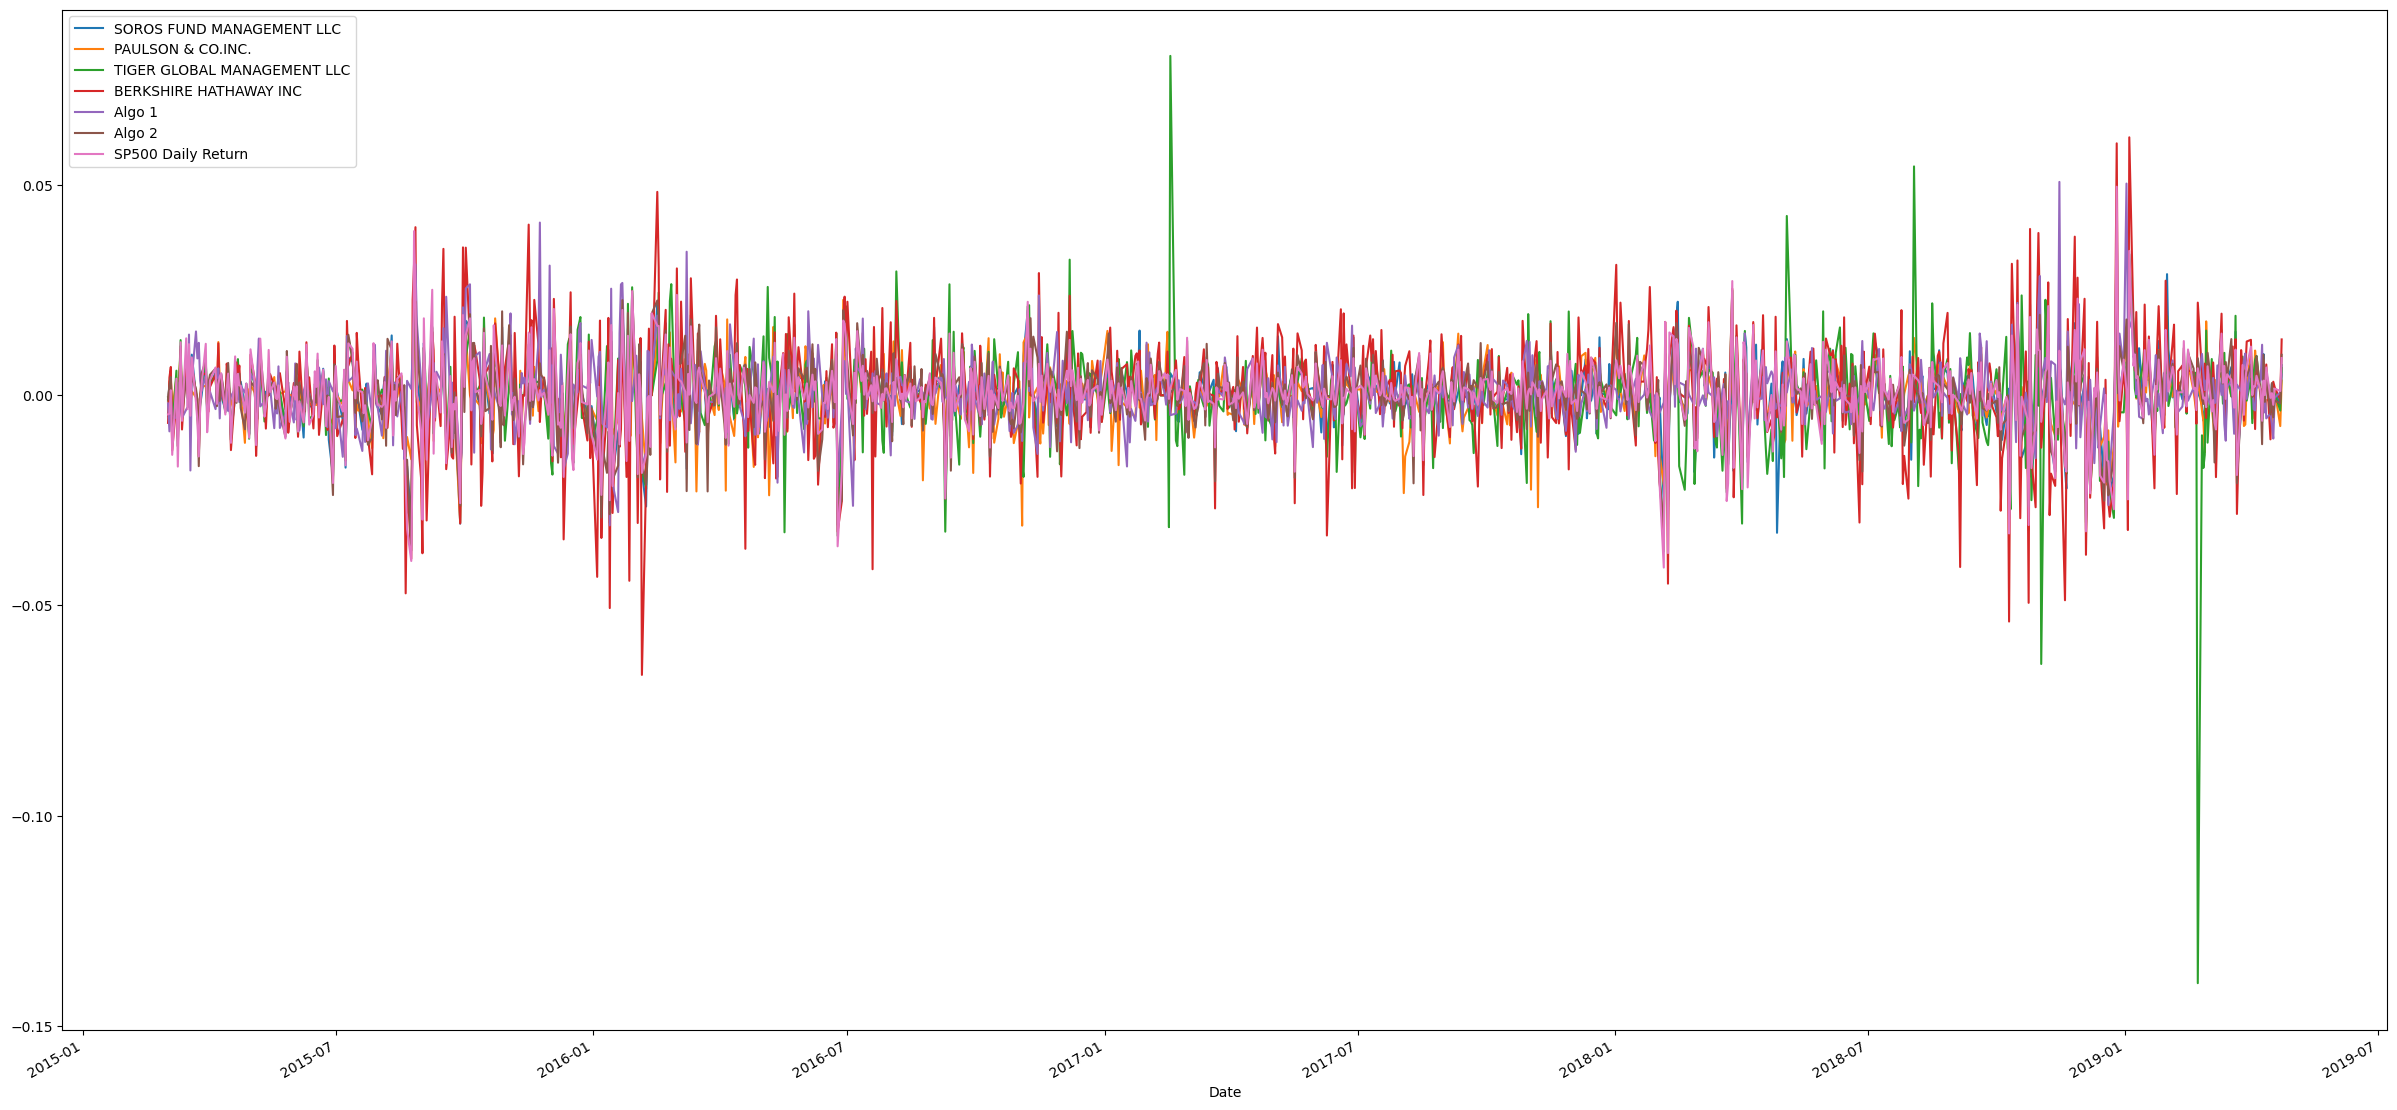

In [24]:
# Plot daily returns of all portfolios
joined_returns.plot(figsize = (30, 15))

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

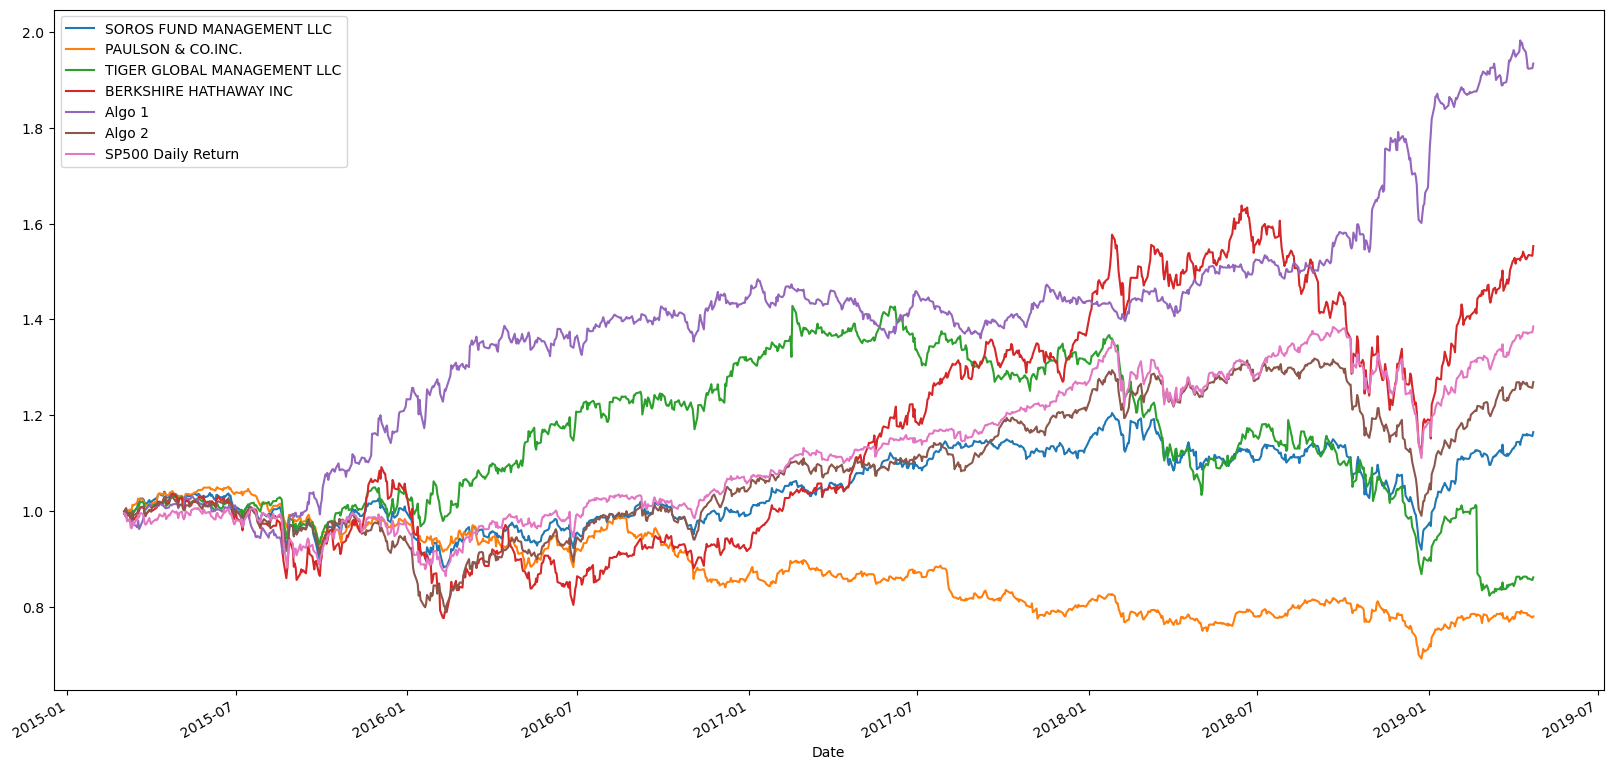

In [25]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + joined_returns).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize = (20,10))

### Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


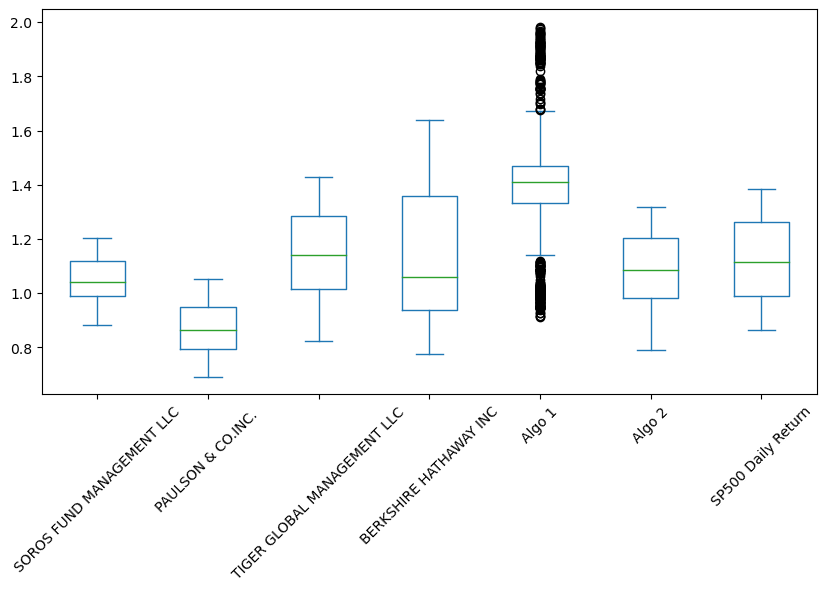

In [26]:
# Box plot to visually show risk
cumulative_boxplot = cumulative_returns.plot.box(figsize = (10, 5))

# Rotate the X axis labels 45 degrees to read more easily
cumulative_boxplot.tick_params(axis = 'x', rotation = 45)

### Calculate Standard Deviations

In [27]:
# Calculate the daily standard deviations of all portfolios
joined_std = joined_returns.std()
joined_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500 Daily Return             0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [29]:
# Calculate  the daily standard deviation of S&P 500 (already calculated above, so I decided to take the 6th element from joined_std)
daily_sp500_std = joined_std[6]
daily_sp500_std
# Determine which portfolios are riskier than the S&P 500
larger_std_sp500_ports = joined_std[joined_std > daily_sp500_std]
larger_std_sp500_ports

TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Calculate the Annualized Standard Deviation

In [32]:
# Calculate the annualized standard deviation (252 trading days)
ann_std = joined_std * np.sqrt(252)
ann_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500 Daily Return             0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [30]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
joined_returns.rolling(window = 21).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Daily Return
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006498
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006537
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006470


<Axes: xlabel='Date'>

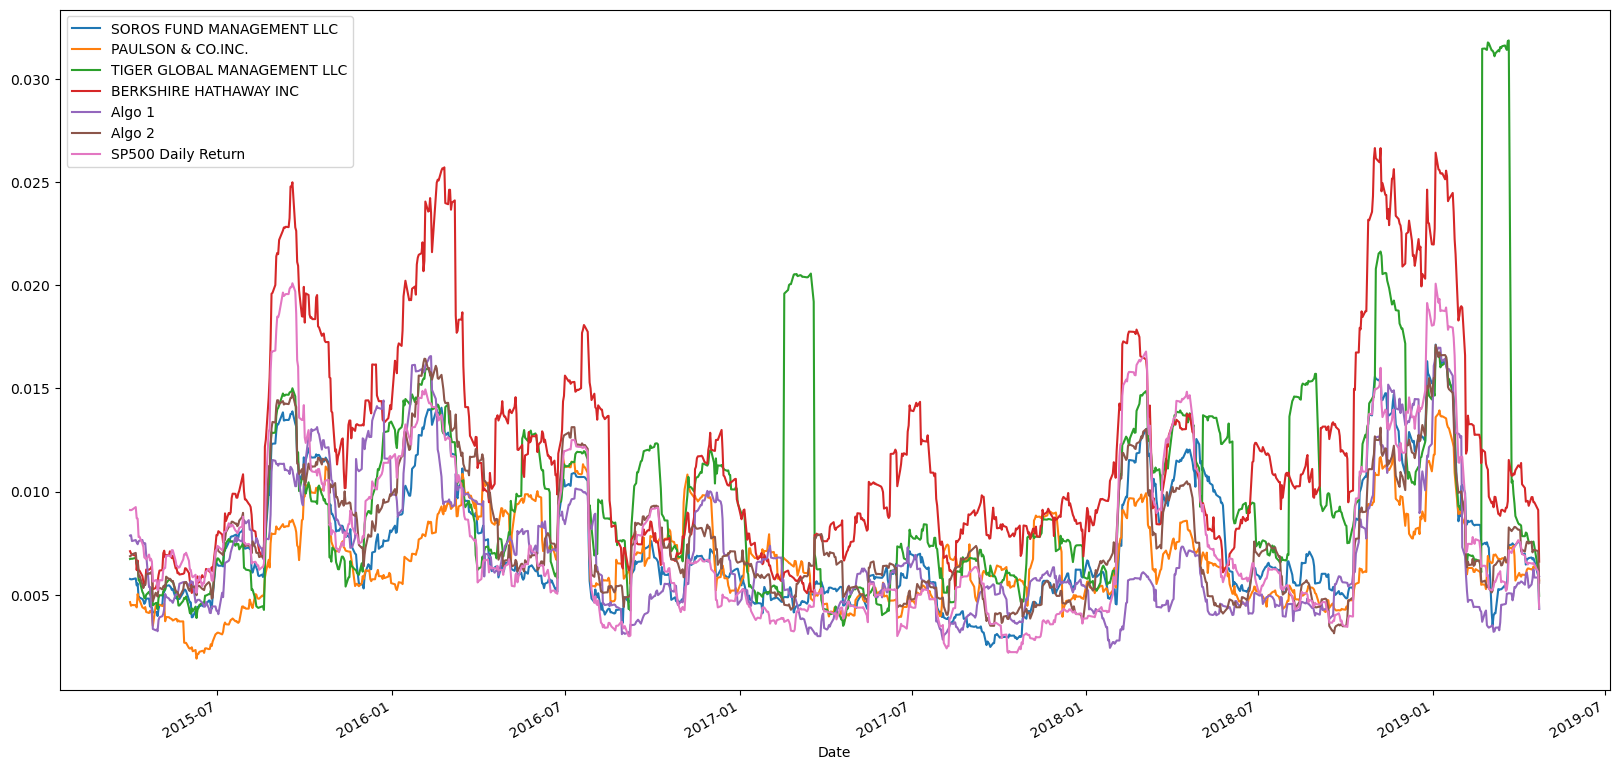

In [31]:
# Plot the rolling standard deviation
joined_returns.rolling(window = 21).std().plot(figsize = (20, 10))

### Calculate and plot the correlation

<Axes: >

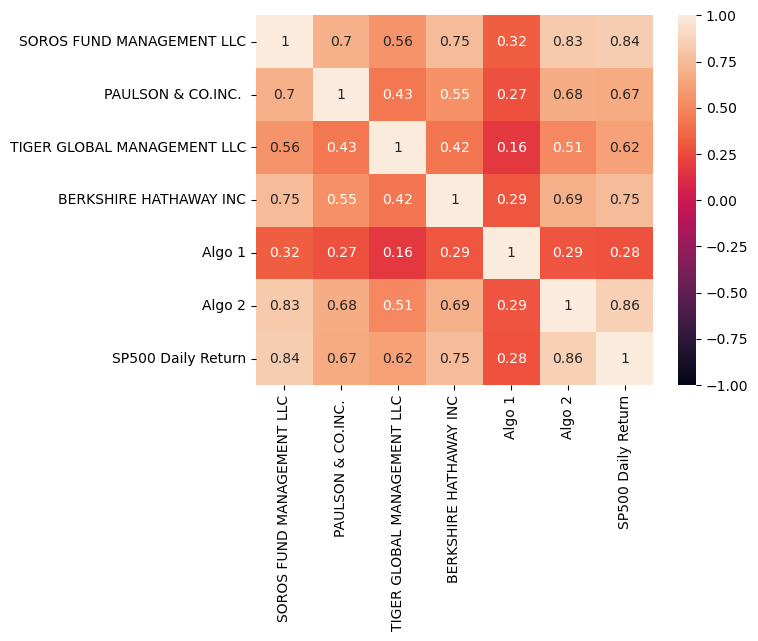

In [33]:
# Calculate the correlation
correlation = joined_returns.corr()
correlation
# Display de correlation matrix
sns.heatmap(correlation, vmin = -1, vmax = 1, annot = True)

### Calculate and Plot the 60-day rolling Beta for a chosen portfolio and the S&P 500

<Axes: xlabel='Date'>

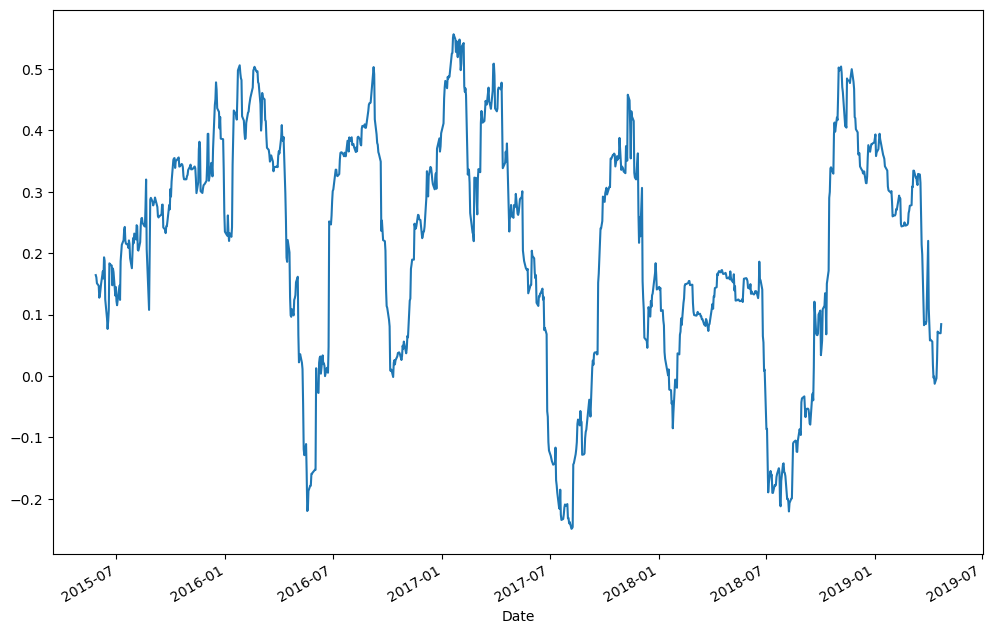

In [40]:
# Calculate the 60-day rolling covariance of a single portfolio in relation to the SP500 (I chose Algorithmic 1 portfolio)
algo1_cov = joined_returns['Algo 1'].rolling(window = 60).cov(joined_returns['SP500 Daily Return'])
algo1_cov

# Calculate the 60-day rolling variance of Algo 1. I called the SP500 Daily Return instead of Algo 1 because Beta is computed as the covariance of a security to market returns divided by the variance of the market returns
algo1_var = joined_returns['SP500 Daily Return'].rolling(window = 60).var()
algo1_var

# Computing Beta of Algo 1
algo1_beta = algo1_cov / algo1_var
algo1_beta.dropna(inplace = True)
algo1_beta.plot(figsize = (12, 8))



## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

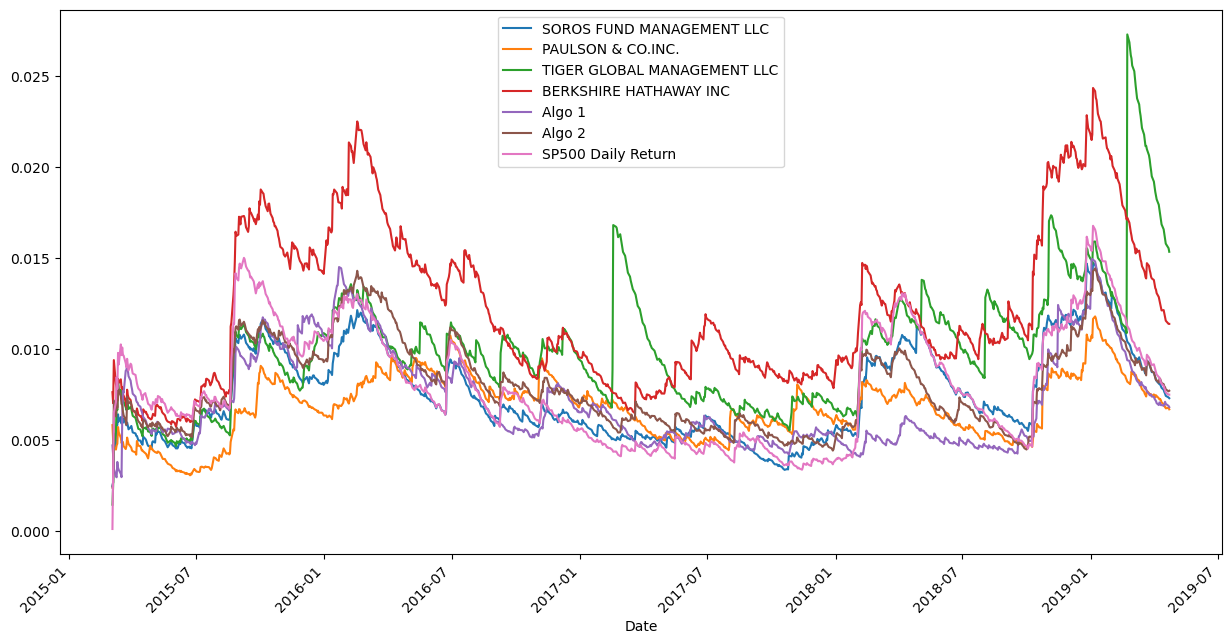

In [41]:
# Use `ewm` to calculate the rolling window
joined_returns.ewm(halflife = 21).std().plot(figsize = (15, 8)).tick_params(axis = 'x', rotation = 45)

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [42]:
# Annualized Sharpe Ratios
sharpe_ratios = (joined_returns.mean() * 252) / (joined_std * np.sqrt(252))
sorted_sharpe = sharpe_ratios.sort_values(ascending = False)
sorted_sharpe

Algo 1                         1.378648
SP500 Daily Return             0.648267
BERKSHIRE HATHAWAY INC         0.621810
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
PAULSON & CO.INC.             -0.483570
dtype: float64

<Axes: >

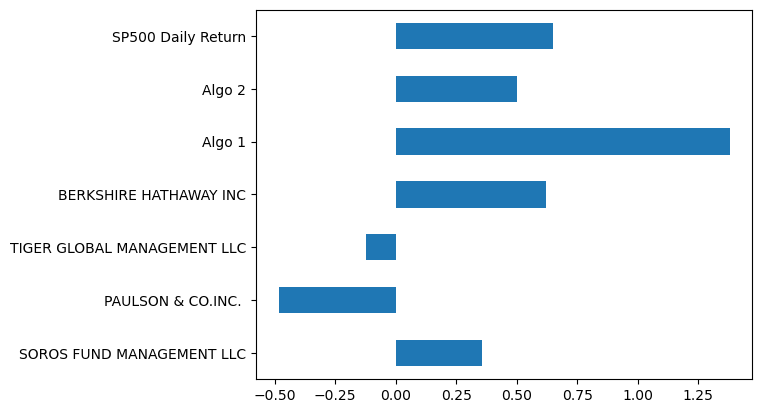

In [43]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'barh')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

The sharpe ratios determine the performance of the individual portfolio versus the risk free rate in relation to the portfolio's standard deviation (volatility). According to the sharpe ratios seen above, the Algo 1 portfolio significantly outperforms the S&P 500 and the whale portfolios. The Algo 2 portfolio, on the other hand, only outperforms the Soros, Tiger, and Paulson portfolios while lagging the Berkshire and S&P 500 portfolios. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [44]:
# Reading data from 1st stock (Costco)
cost_data = Path('Resources/COST.csv')
cost = pd.read_csv(cost_data, index_col = 'Date', infer_datetime_format = True, parse_dates = True)
cost.head()

/var/folders/gs/w1q4fksx5gd23d1fqxjmk5_w0000gn/T/ipykernel_36092/31851467.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  cost = pd.read_csv(cost_data, index_col = 'Date', infer_datetime_format = True, parse_dates = True)
/var/folders/gs/w1q4fksx5gd23d1fqxjmk5_w0000gn/T/ipykernel_36092/31851467.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cost = pd.read_csv(cost_data, index_col = 'Date', infer_datetime_format = True, parse_dates = True)


,Close
Date,
2014-06-05,117.750000
2014-06-06,118.230003
2014-06-09,117.779999
2014-06-10,117.099998
2014-06-11,116.239998


In [45]:
# Reading data from 2nd stock (JPMorgan)
jpm_data = Path('Resources/JPM.csv')
jpm = pd.read_csv(jpm_data, index_col = 'Date', infer_datetime_format = True, parse_dates = True)
jpm.head()

/var/folders/gs/w1q4fksx5gd23d1fqxjmk5_w0000gn/T/ipykernel_36092/3390638130.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  jpm = pd.read_csv(jpm_data, index_col = 'Date', infer_datetime_format = True, parse_dates = True)
/var/folders/gs/w1q4fksx5gd23d1fqxjmk5_w0000gn/T/ipykernel_36092/3390638130.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  jpm = pd.read_csv(jpm_data, index_col = 'Date', infer_datetime_format = True, parse_dates = True)


,Close
Date,
2014-06-05,56.630001
2014-06-06,56.970001
2014-06-09,57.419998
2014-06-10,57.900002
2014-06-11,57.270000


In [46]:
# Reading data from 3rd stock (Nvidia)
nvda_data = Path('Resources/NVDA.csv')
nvda = pd.read_csv(nvda_data, index_col = 'Date', infer_datetime_format = True, parse_dates = True)
nvda.head()

/var/folders/gs/w1q4fksx5gd23d1fqxjmk5_w0000gn/T/ipykernel_36092/4258215047.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  nvda = pd.read_csv(nvda_data, index_col = 'Date', infer_datetime_format = True, parse_dates = True)
/var/folders/gs/w1q4fksx5gd23d1fqxjmk5_w0000gn/T/ipykernel_36092/4258215047.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nvda = pd.read_csv(nvda_data, index_col = 'Date', infer_datetime_format = True, parse_dates = True)


,Close
Date,
2014-06-05,4.7400
2014-06-06,4.7575
2014-06-09,4.7625
2014-06-10,4.7875
2014-06-11,4.8500


In [47]:
# Combine all stocks in a single DataFrame
my_port = pd.concat([cost, jpm, nvda], axis = 'columns', join = 'inner')
my_port.head()

,Close,Close,Close
Date,,,
2014-06-05,117.750000,56.630001,4.7400
2014-06-06,118.230003,56.970001,4.7575
2014-06-09,117.779999,57.419998,4.7625
2014-06-10,117.099998,57.900002,4.7875
2014-06-11,116.239998,57.270000,4.8500


In [48]:
# Reset Date index
my_port.columns = ['COST', 'JPM', 'NVDA']
my_port.head()

,COST,JPM,NVDA
Date,,,
2014-06-05,117.750000,56.630001,4.7400
2014-06-06,118.230003,56.970001,4.7575
2014-06-09,117.779999,57.419998,4.7625
2014-06-10,117.099998,57.900002,4.7875
2014-06-11,116.239998,57.270000,4.8500


In [49]:
# Reorganize portfolio data by having a column per symbol
# The data was formatted this way since the beginning 
my_port.head()

,COST,JPM,NVDA
Date,,,
2014-06-05,117.750000,56.630001,4.7400
2014-06-06,118.230003,56.970001,4.7575
2014-06-09,117.779999,57.419998,4.7625
2014-06-10,117.099998,57.900002,4.7875
2014-06-11,116.239998,57.270000,4.8500


In [50]:
# Calculate daily returns
my_port_rtns = my_port.pct_change()

# Drop NAs
my_port_rtns.dropna(inplace = True)

# Display sample data
my_port_rtns

,COST,JPM,NVDA
Date,,,
2014-06-06,0.004076,0.006004,0.003692
2014-06-09,-0.003806,0.007899,0.001051
2014-06-10,-0.005773,0.008360,0.005249
2014-06-11,-0.007344,-0.010881,0.013055
2014-06-12,-0.006882,-0.004016,0.006186
...,...,...,...
2019-04-24,0.009691,-0.001670,0.002622
2019-04-25,-0.009518,0.000528,-0.022284
2019-04-26,-0.007248,0.007570,-0.047189


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [51]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_weighted_rtns = my_port_rtns.dot(weights)

# Display sample data
my_weighted_rtns

Date
2014-06-06    0.004591
2014-06-09    0.001715
2014-06-10    0.002612
2014-06-11   -0.001723
2014-06-12   -0.001571
                ...   
2019-04-24    0.003548
2019-04-25   -0.010424
2019-04-26   -0.015622
2019-04-29    0.007755
2019-04-30    0.004609
Length: 1233, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [52]:
# Join your returns DataFrame to the original returns DataFrame
total_port = pd.concat([joined_returns, my_weighted_rtns], axis = 'columns', join = 'inner')
total_port.rename(columns = {0 : 'My Port'}, inplace = True)  # My Port got printed with the name 0 after concatenation so I renamed it
total_port.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Daily Return,My Port
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.006400
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,0.004165
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.014753
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.014082
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.006767


In [53]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
total_port.dropna()
total_port.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500 Daily Return             0
My Port                        0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [54]:
# Calculate the annualized `std`
new_ann_std = (total_port.std() * np.sqrt(252))
new_ann_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500 Daily Return             0.135786
My Port                        0.211040
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Date'>

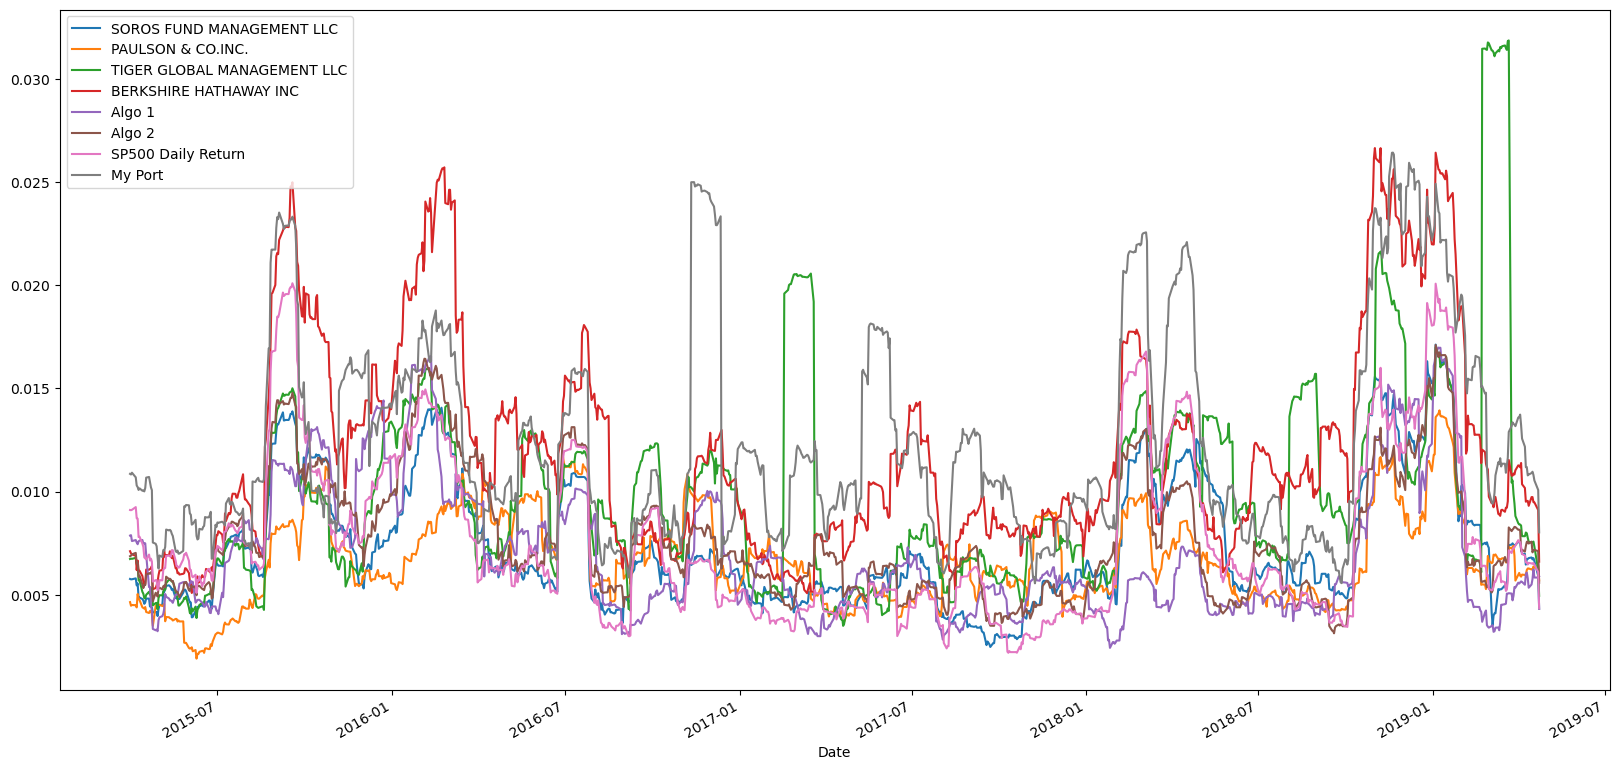

In [55]:
# Calculate rolling standard deviation
total_port_roll_std = total_port.rolling(window = 21).std()
total_port_roll_std

# Plot rolling standard deviation
total_port_roll_std.plot(figsize = (20, 10))


### Calculate and plot the correlation

<Axes: >

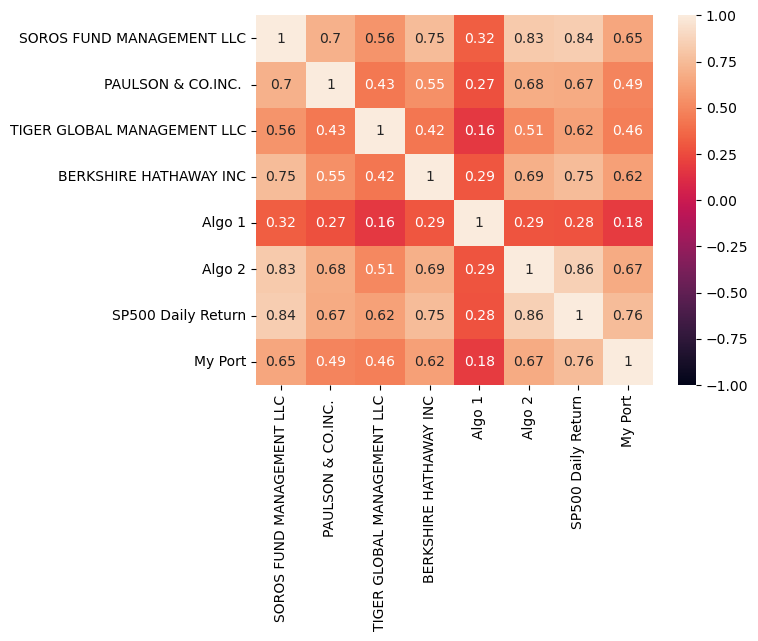

In [56]:
# Calculate and plot the correlation
new_correlation = total_port.corr()
new_correlation
# Display de correlation matrix
sns.heatmap(new_correlation, vmin = -1, vmax = 1, annot = True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: xlabel='Date'>

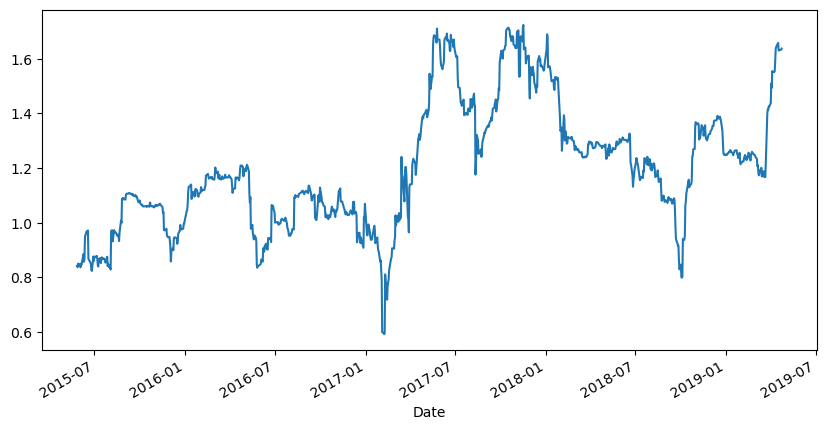

In [61]:
## Calculate and plot Beta
# Calculate the 60-day rolling covariance of my portfolio
my_cov = total_port['My Port'].rolling(window = 60).cov(total_port['SP500 Daily Return'])
my_cov

# Calculate the 60-day rolling variance my portfolio
my_var = total_port['SP500 Daily Return'].rolling(window = 60).var()
my_var

# Computing beta my portfolio
my_beta = my_cov / my_var
my_beta.dropna(inplace = True)
my_beta

## Plot beta trend
my_beta.plot(figsize = (10, 5))



### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [58]:
# Calculate Annualized Sharpe Ratios
new_sharpe_ratios = (total_port.mean() * 252) / (total_port.std() * np.sqrt(252))
sorted_new_sharpe = new_sharpe_ratios.sort_values(ascending = False)
sorted_new_sharpe

My Port                        1.456034
Algo 1                         1.378648
SP500 Daily Return             0.648267
BERKSHIRE HATHAWAY INC         0.621810
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
PAULSON & CO.INC.             -0.483570
dtype: float64

<Axes: >

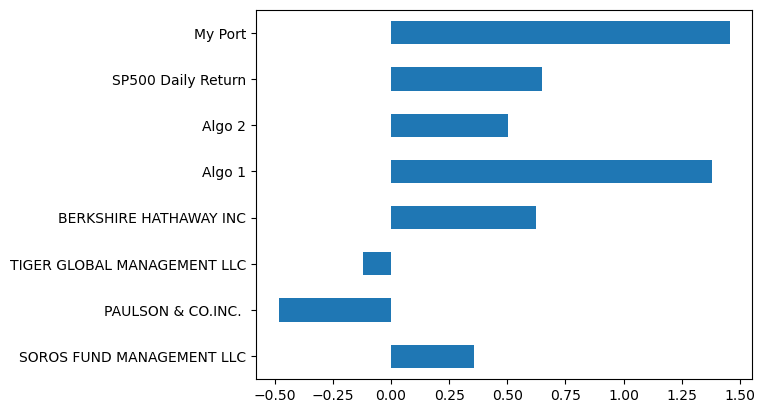

In [59]:
# Visualize the sharpe ratios as a bar plot
new_sharpe_ratios.plot(kind = 'barh')

### How does your portfolio do?

Small but mighty is how I would describe my portfolio. My portfolio is comprised of only three stocks, but it even beats the Algo 1 portfolio which was already agressively leading the group. A sharpe ratio of 1.45 means my portfolio delivers returns considerably greater than the risk free rate in regards to its own volatility.